In [5]:
import numpy as np
from sklearn.datasets import make_regression

In [222]:
X, y = make_regression(n_samples=100, n_features=2, n_informative=2, n_targets=1,noise=13, random_state=2)

In [224]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.25, random_state=3)

In [228]:
X_train

array([[ 1.10914328e+00, -1.76491773e+00],
       [-3.25049628e-01, -5.60234506e-01],
       [-6.37655012e-01, -1.18761229e+00],
       [-1.48246548e+00,  8.46311892e-01],
       [ 3.70444537e-01,  1.35963386e+00],
       [-3.64479092e-01, -8.75979478e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-2.13619610e+00,  1.64027081e+00],
       [ 4.10869262e+00,  8.21120877e-01],
       [ 1.36723542e+00,  1.21788563e+00],
       [-1.54667461e+00, -2.08265194e+00],
       [-8.78107893e-01, -1.56434170e-01],
       [ 5.02881417e-01, -1.24528809e+00],
       [-1.25542722e+00,  9.38163671e-01],
       [-7.19253841e-01, -5.83414595e-01],
       [-2.69056960e-01,  2.23136679e+00],
       [-3.75669423e-01, -7.44707629e-02],
       [-1.86809065e+00,  1.73118467e+00],
       [ 1.46767801e+00, -3.35677339e-01],
       [ 7.99179995e-01,  1.26261366e+00],
       [ 5.51454045e-01,  2.29220801e+00],
       [ 6.10144086e-01,  4.23496900e-01],
       [ 9.60781945e-01,  7.58370347e-01],
       [-3.

In [230]:
Y_train

array([ 1.06663212e+01, -2.41284176e+01, -4.23383586e+01, -6.28392170e+01,
        2.74241021e+01, -1.34562176e+01,  3.38410995e+00, -3.25784426e+01,
        1.71520711e+02,  8.09157140e+01, -1.04520058e+02, -4.03310841e+01,
       -1.71875365e+01, -5.73810884e+01, -3.28964116e+01,  3.34358219e+01,
       -1.51761666e+00, -5.12755565e+01,  5.06886452e+01,  4.67060176e+01,
        7.14247833e+01,  2.61120323e+01,  4.37652554e+01, -1.58449214e+01,
       -9.01749019e+01, -6.40442109e+01,  4.97002763e+01,  1.26665214e+01,
       -2.34090949e+00, -4.05276685e+01, -1.14974839e+01,  6.73311086e+00,
       -1.94750281e+01, -8.35194912e+01,  3.75518662e+01,  4.11770323e+01,
        5.04620962e-01,  1.24332821e+01, -3.33582585e+01,  8.13845882e+01,
       -2.61897055e+01, -3.21194040e+01, -2.32847663e-03,  7.85068016e+01,
        5.71386651e+01, -1.87990361e+01,  3.54018104e+01, -1.52831985e+01,
        7.95000153e+01, -9.66092365e+00, -1.00290587e+01,  5.02362877e+00,
        1.59143213e+00, -

In [232]:
from sklearn.linear_model import Ridge

In [234]:
ridge = Ridge(alpha=0.5, solver='cholesky')

In [236]:
ridge.fit(X_train, Y_train)

Ridge(alpha=0.5, solver='cholesky')

In [238]:
y_pred = ridge.predict(X_test)

In [240]:
y_pred

array([ -44.43169039,  -19.73320069,  -62.35860757,   24.08001641,
         34.66005097,    8.70227824,  -29.20066223,   19.77648416,
          3.51573808,   17.32838607,  -47.34900357,   30.16733233,
        -14.36153135,  -52.94736678,   10.70556904,    9.58388282,
       -103.72743983,   59.42053239,  -19.28417431,   -9.20062139,
         50.28697144,   32.49519482,   17.61852747,  -31.88195516,
        -26.60248005])

In [242]:
Y_test

array([ -42.05510547,  -32.14967475,  -57.56860887,    9.23533379,
          3.6517273 ,    8.48610902,  -24.02109718,   -3.83230027,
         -4.30256093,   16.25263571,  -36.16512598,   36.1118999 ,
        -25.3798122 ,  -57.2982686 ,   -7.47612693,    6.93060151,
       -120.02892763,   56.04446529,  -15.83635757,  -25.41091699,
         51.85829027,   39.53113363,   18.21368478,  -42.23461667,
        -12.22972585])

In [244]:
from sklearn.metrics import r2_score

In [246]:
r2score = r2_score(Y_test, y_pred)

In [248]:
r2score

0.9010941009336139

In [250]:
import matplotlib.pyplot as py

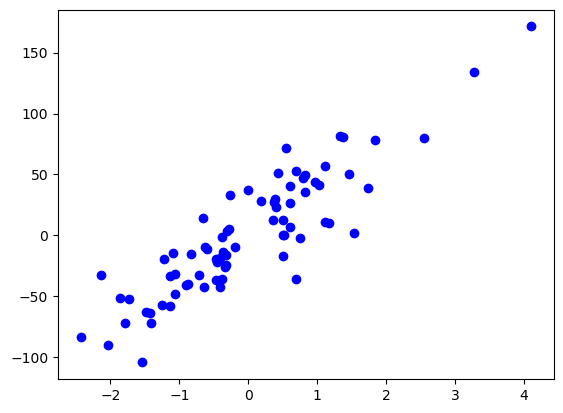

In [252]:
py.scatter(X_train[:, 0], Y_train, color="blue")

In [254]:
ridge.intercept_

-0.924900772199014

In [256]:
ridge.coef_

array([38.02842989, 18.23733228])

In [258]:
X_train.shape

(75, 2)

In [260]:
class MRidge:
    def __init__(self, alpha=0.1):
        self.coef_ = None
        self.intercept_ = None
        self.alpha = alpha

    def fit(self, X, Y):
        X = np.insert(X, 0, 1, axis=1)
        I = np.identity(X.shape[1])
        I[0][0] = 0

        betas = np.linalg.inv(np.dot(X.T, X) + self.alpha * I).dot(X.T).dot(Y)
        self.coef_ = betas[1:]
        self.intercept_ = betas[0]

        print(self.coef_)
        print(self.intercept_)

    def predict(self, X_test):
        return self.coef_ * X_test + self.intercept

        

In [262]:
mridge = MRidge(alpha = 10)

In [264]:
mridge.fit(X_train,Y_train)

[34.8532277  15.95446711]
-0.74059409600343


In [266]:
myr2score = r2_score(Y_test,y_pred)
myr2score

0.9010941009336139